In [82]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_squared_error


In [36]:
bank_df = pd.read_csv("data.csv")

In [37]:
bank_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
bank_df = pd.get_dummies(bank_df,columns=["country","gender"], prefix=['country',"gender"])

In [39]:
bank_df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [40]:
bank_df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
bank_df.dtypes

customer_id           int64
credit_score          int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
country_France        uint8
country_Germany       uint8
country_Spain         uint8
gender_Female         uint8
gender_Male           uint8
dtype: object

In [42]:
bank_df.isnull().sum(axis = 0)

customer_id         0
credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
country_France      0
country_Germany     0
country_Spain       0
gender_Female       0
gender_Male         0
dtype: int64

In [43]:
X = bank_df.drop("churn",axis=1).values
y = bank_df["churn"].values

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [59]:
train_scores = {}
test_scores = {}
neighbors = np.arange(1,21)
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train,y_train)
  train_scores[neighbor] = knn.score(X_train,y_train)
  test_scores[neighbor] = knn.score(X_test,y_test)

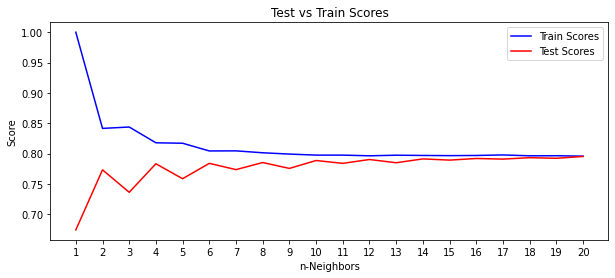

In [87]:
plt.figure(figsize=(10,4))
plt.ylabel("Score")
plt.xlabel("n-Neighbors")
plt.title("Test vs Train Scores")
plt.plot(neighbors,train_scores.values(),color="b",label="Train Scores")
plt.plot(neighbors,test_scores.values(),color="r",label="Test Scores")
plt.xticks(range(min(neighbors), math.ceil(max(neighbors))+1))
plt.legend()
plt.show()

#### n_neighors = 10

In [92]:
knn = KNeighborsClassifier(n_neighbors=10)

In [93]:
kf = KFold(n_splits=6,shuffle=True,random_state=42)
cv_results = cross_val_score(knn,X_train,y_train,cv=kf)

In [94]:
print(cv_results)

[0.77463582 0.79948586 0.7832048  0.77634961 0.79931389 0.80789022]


In [95]:
print(np.mean(cv_results),np.std(cv_results))

0.790146701530511 0.012683499745303495


In [96]:
print(np.quantile(cv_results,[0.025,0.975]))

[0.77485004 0.80683968]
